In [ ]:
import pandas as pd
data = pd.read_csv("/content/churn.csv")

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


First we will do EDA (exploratory data analysis) for understanding the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
data.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

REMOVING COLUMNS WHICH ARE NOT RELEVANT


In [ ]:
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

In [ ]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Check the unique values for each column

In [ ]:
result =data.nunique().reset_index()
result.columns=['Features',"Unique Values"]
result

,Features,Unique Values
0,CreditScore,460
1,Geography,3
2,Gender,2
3,Age,70
4,Tenure,11
5,Balance,6382
6,NumOfProducts,4
7,HasCrCard,2
8,IsActiveMember,2
9,EstimatedSalary,9999


Now we will consider categorical columns and print there unique values

In [ ]:
columns_interest = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'Exited']
unique_values={}
for column in columns_interest:
  unique_values[column]=data[column].unique()
for column,values in unique_values.items():
  print(f"Unique values for {column}: {values}")

Unique values for Geography: ['France' 'Spain' 'Germany']
Unique values for Gender: ['Female' 'Male']
Unique values for NumOfProducts: [1 3 2 4]
Unique values for HasCrCard: [1 0]
Unique values for IsActiveMember: [1 0]
Unique values for Exited: [1 0]


Propotion of churned to retained customers

In [ ]:
exit_counts = data["Exited"].value_counts(normalize=True)
print(exit_counts)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


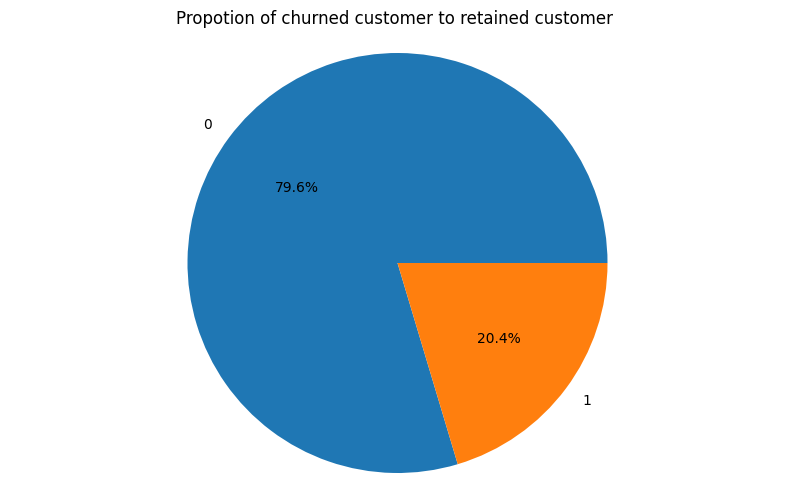

In [ ]:
##Now we will visualize the above
plt.figure(figsize=(10,6))
plt.pie(exit_counts,labels=exit_counts.index,autopct="%1.1f%%")
plt.title("Propotion of churned customer to retained customer ")
plt.axis("equal")
plt.show()

Now we will consider columns with numeric value and discrete value differently and use proper visualization tols accordingly

In [ ]:
data_numeric = data.select_dtypes(include=["float",'int'])
data_numeric.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


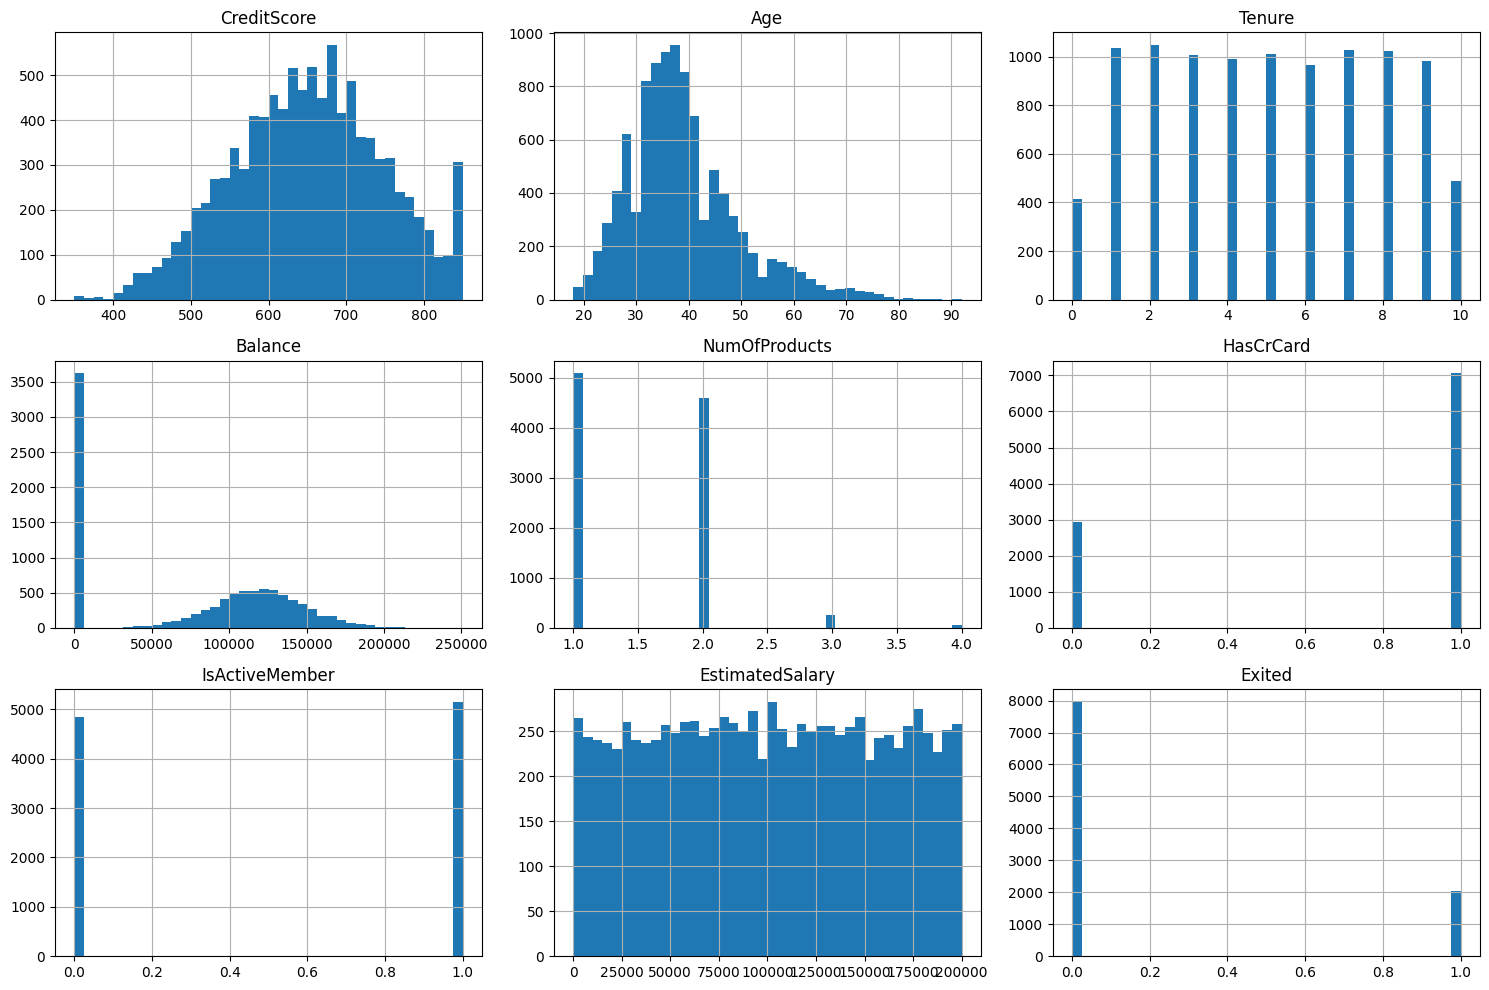

In [ ]:
data_numeric.hist(bins=40,figsize=(15,10))
plt.tight_layout()
plt.show()

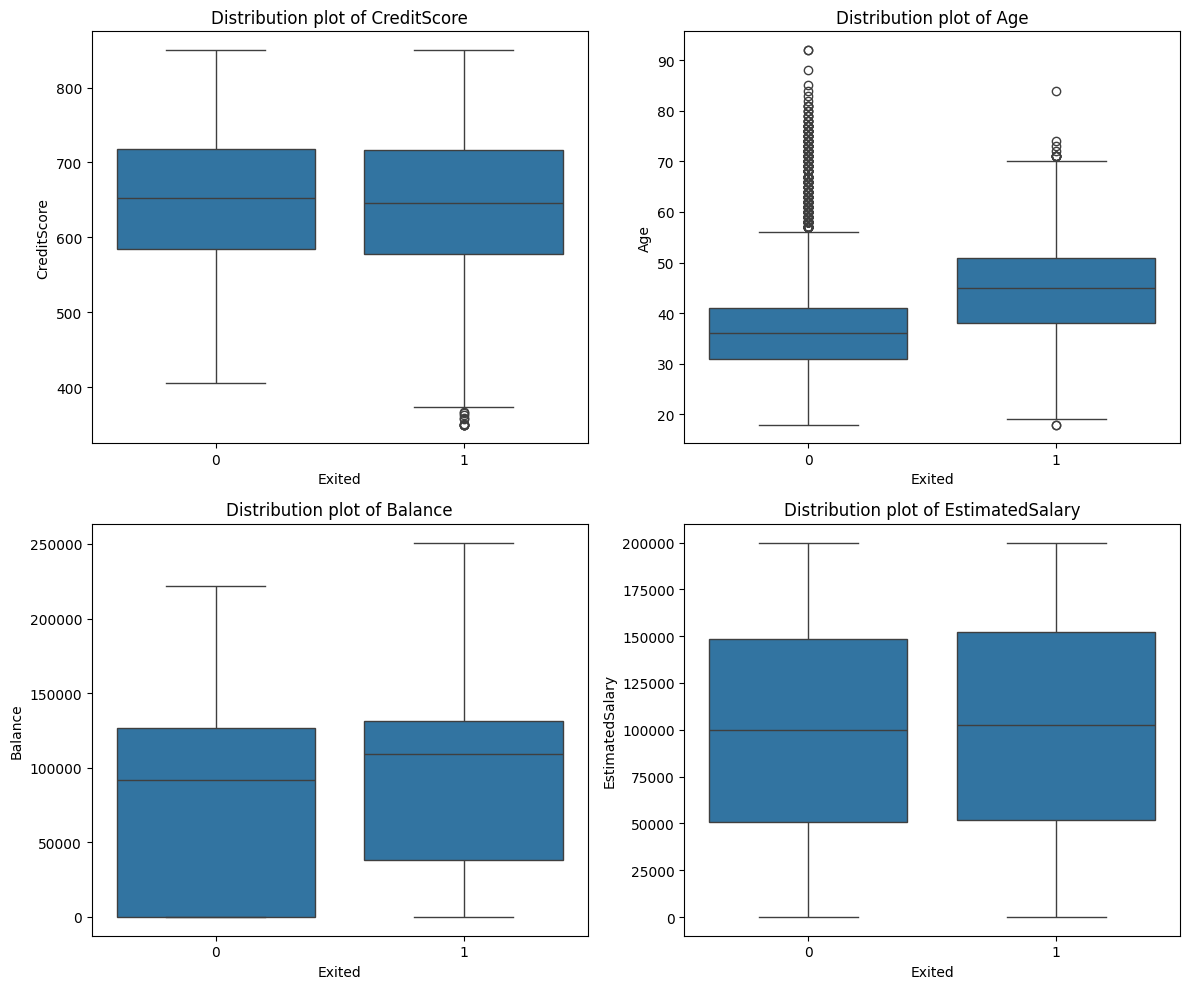

In [ ]:
# Now draw box plots for continous columns with respected to exited columns
continous_col = data_numeric[["CreditScore","Age","Balance","EstimatedSalary"]]
#create subplots
#Create distribution plot
plt.figure(figsize=(12,10))
for i,col in enumerate(continous_col.columns):
  plt.subplot(2,2,i+1)
  sns.boxplot(data =data_numeric,x="Exited",y=col)
  plt.title(f"Distribution plot of {col}")
  plt.tight_layout()
plt.show()

From above box plot we go to know that most churned customer have salary ranging from 50000 -150000
for retained is 0-125000

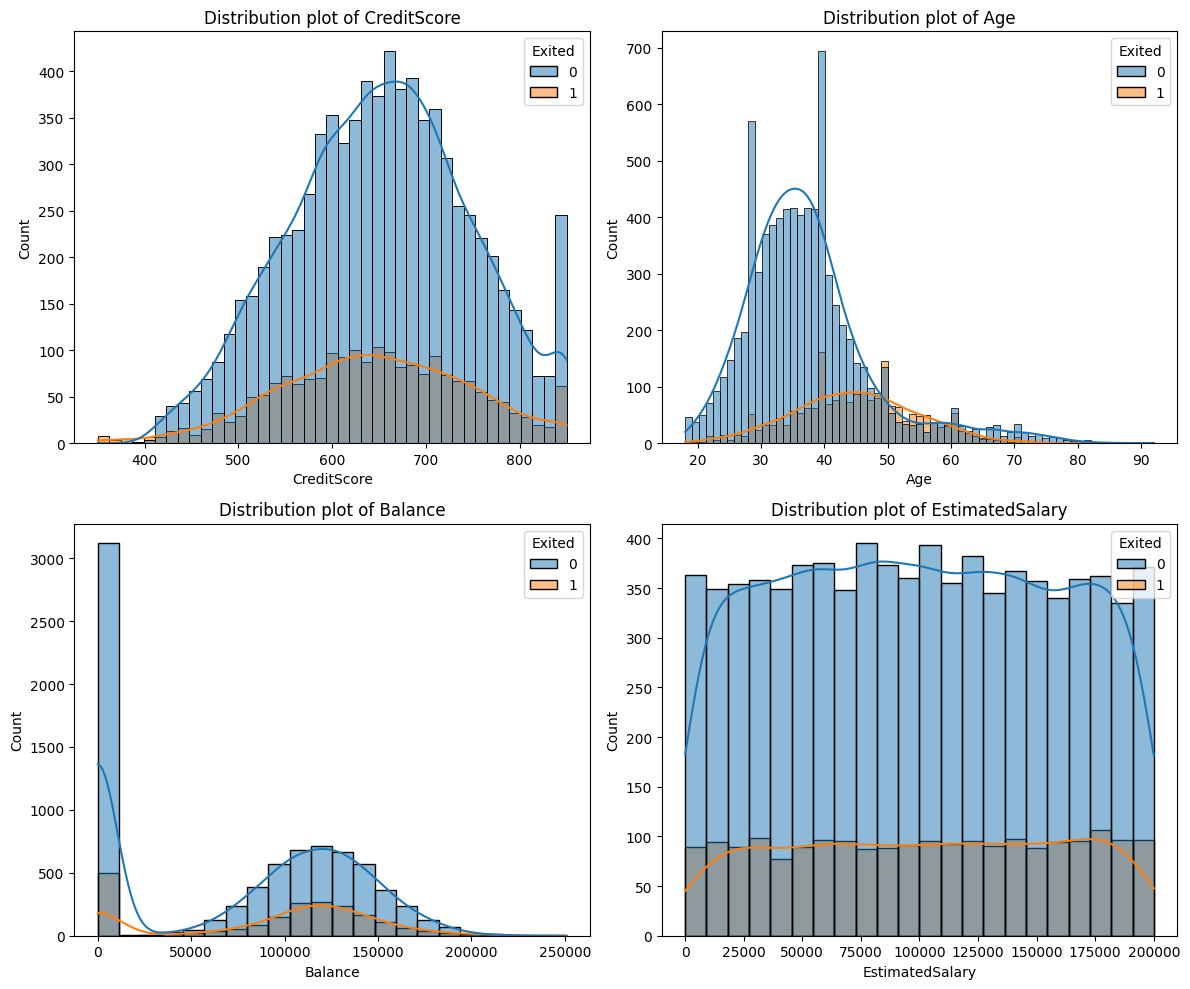

In [ ]:
#Create distribution plot
plt.figure(figsize=(12,10))
for i,col in enumerate(continous_col.columns):
  plt.subplot(2,2,i+1)
  sns.histplot(data =data_numeric,kde=True,hue="Exited",x=col)
  plt.title(f"Distribution plot of {col}")
  plt.tight_layout()
plt.show()

In [ ]:
#now visualization for discrete values
data_discrete = data[["Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember"]]
data_discrete.head()

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember
0,France,Female,1,1,1
1,Spain,Female,1,0,1
2,France,Female,3,1,0
3,France,Female,2,0,0
4,Spain,Female,1,1,1


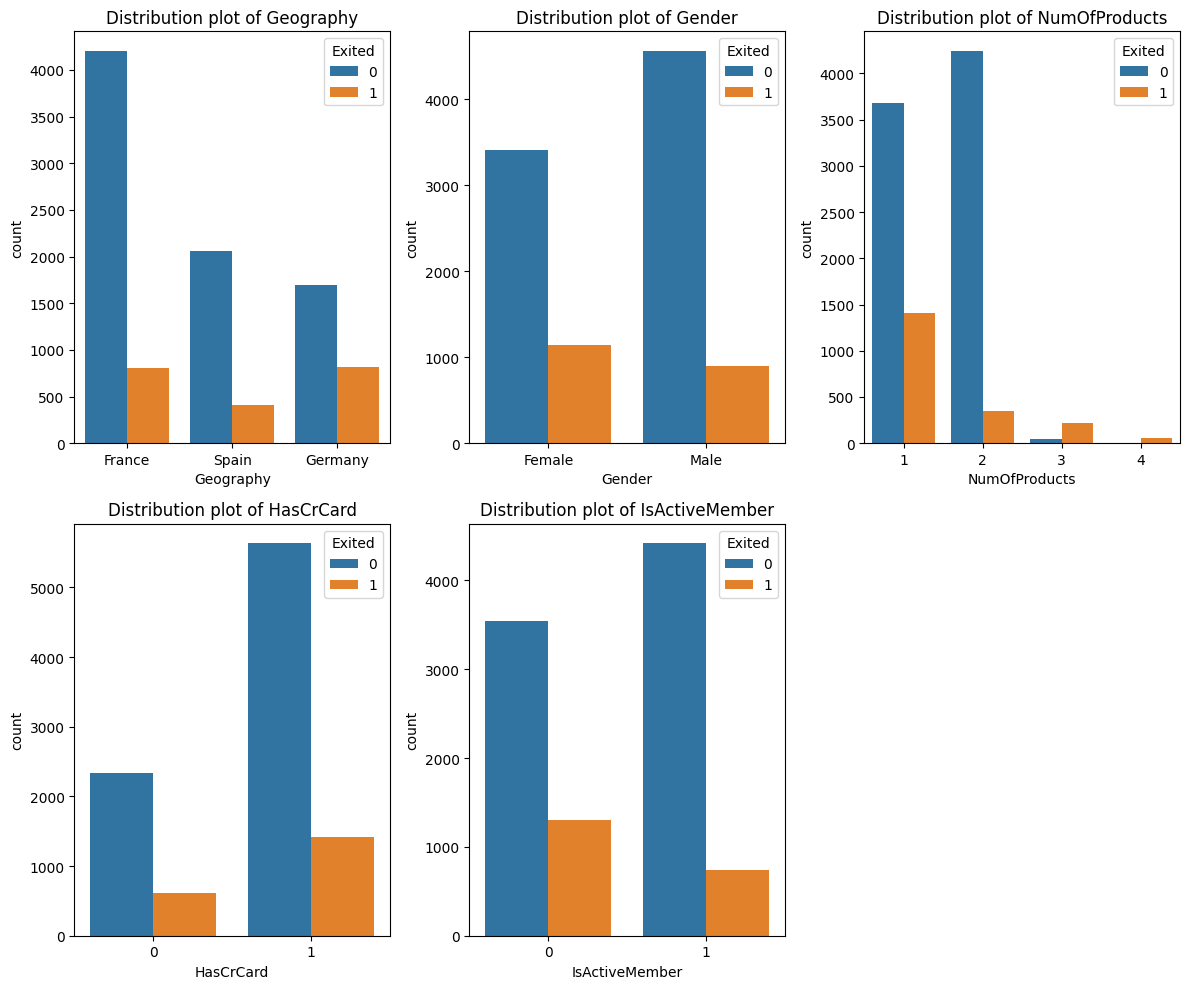

In [ ]:
plt.figure(figsize=(12,10))
for i,col in enumerate(data_discrete.columns):
  plt.subplot(2,3,i+1)
  sns.countplot(x=col,data=data,hue="Exited")
  plt.title(f"Distribution plot of {col}")
  plt.tight_layout()
plt.show()

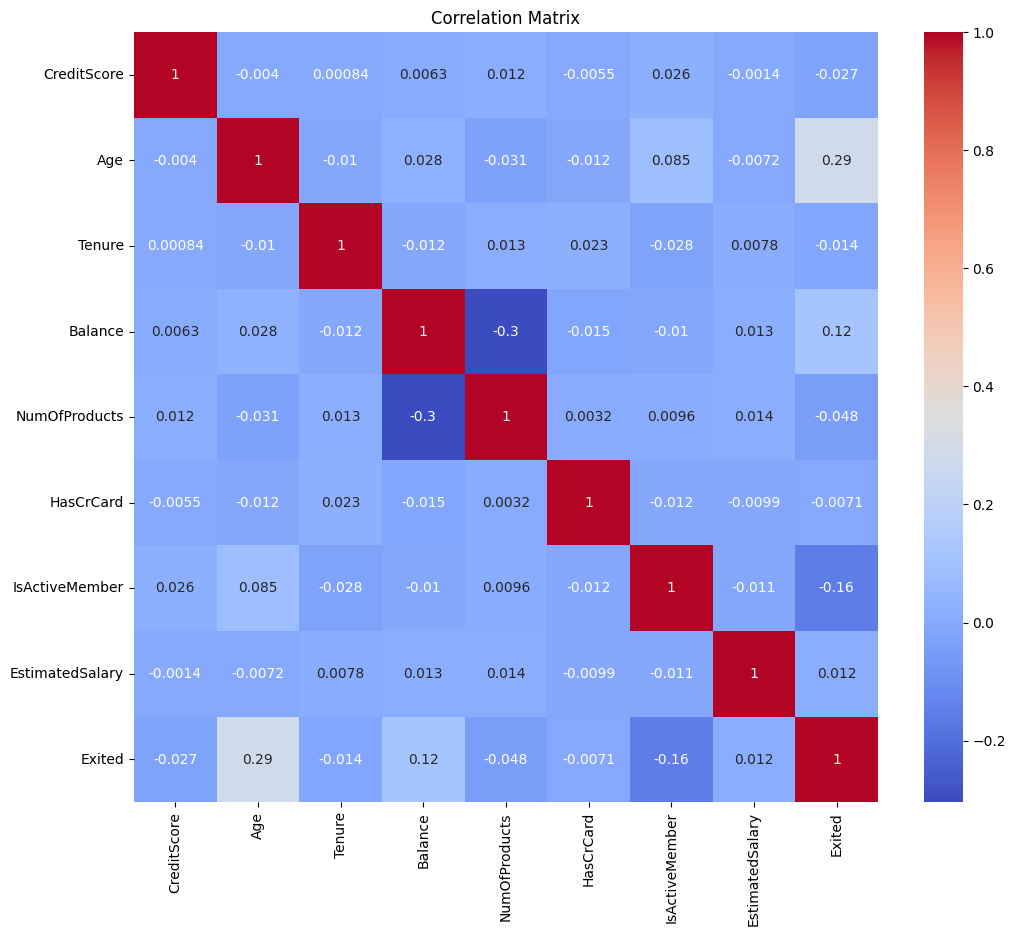

In [ ]:
#check correlation between different numeric features among themselves
plt.figure(figsize=(12,10))
sns.heatmap(data_numeric.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

No Feature is inter indepeendent hence no multicollinearity now We weill Proceed towards data preprocessing

In [ ]:
# Importing necessary libraries for machine learning
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score,\
                             classification_report)
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [ ]:
#Now transform categorical features into numerical features
# We can do this using mapping or ordinal encoder
oe = OrdinalEncoder()
cols = data[["Geography","Gender"]]
encoded_values = oe.fit_transform(cols)
data[["Geography","Gender"]]=encoded_values
encoded_values

array([[0., 0.],
       [2., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [1., 1.],
       [0., 0.]])

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88,1
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58,0
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57,1
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63,0
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
##split the data in training and testing data
##X represent features and y represent labels
X=data.drop("Exited",axis=1)
y=data["Exited"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
print(X_train.shape,y_train.shape)

(8000, 10) (8000,)


In [ ]:
#Now we will use standard scaler so that all the values have same same
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_df = pd.DataFrame(data=X_train,columns=X.columns)
X_train_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.356500,-0.905550,0.913248,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670
1,-0.203898,0.301649,0.913248,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254
2,-0.961472,1.508847,0.913248,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807
3,-0.940717,-0.905550,-1.094993,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393
4,-1.397337,-0.905550,0.913248,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600


We will use random forest feature importance feature to check importance of different values on our data

In [ ]:
model =RandomForestClassifier()
model.fit(X_train,y_train)
feature_importance=model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature":X_train_df.columns,"Importance":feature_importance})
feature_importance_df.sort_values(by="Importance",ascending=False,inplace=True)
feature_importance_df

,Feature,Importance
3,Age,0.238208
9,EstimatedSalary,0.150421
0,CreditScore,0.142138
5,Balance,0.139783
6,NumOfProducts,0.133312
4,Tenure,0.080753
8,IsActiveMember,0.039595
1,Geography,0.036296
2,Gender,0.019926
7,HasCrCard,0.019568


Since the depent varaible has a sample imbalance so we apply SMOTE technique(synthetic Minority Over Sampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("before smote : ")
print(f"shape of X_train: {X_train.shape}")
print(f"shape of y_train: {y_train.shape}")
print("after smote")
print(f"shape of X_train_sm: {X_train_sm.shape}")
print(f"shape of y_train_sm: {y_train_sm.shape}")

before smote : 
shape of X_train: (8000, 10)
shape of y_train: (8000,)
after smote
shape of X_train_sm: (12712, 10)
shape of y_train_sm: (12712,)


In [ ]:
pd.Series(y_train_sm).value_counts()

,count
0,6356
1,6356


In [ ]:
#Hyper parameter tuning and model selection
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "XGBoost": XGBClassifier()
}
results= {}
for name,model in models.items():
  model.fit(X_train_sm,y_train_sm)
  #predicting the value
  y_pred = model.predict(X_test)
  #evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  F1_score=f1_score(y_test,y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  results[name] = {
      "Accuracy": accuracy,
      "F1 Score": F1_score,
      "ROC AUC": roc_auc,
      "Precision": precision,
      "Recall": recall
  }
results_df =pd.DataFrame(results).T
results_df

,Accuracy,F1 Score,ROC AUC,Precision,Recall
Logistic Regression,0.7100,0.483066,0.702282,0.371742,0.689567
Decision Tree,0.7780,0.494305,0.692696,0.447423,0.552163
K-Nearest Neighbors,0.7445,0.500489,0.709334,0.406349,0.651399
Random Forest,0.8415,0.595147,0.747589,0.597436,0.592875
Support Vector Machine,0.7880,0.574297,0.765237,0.474295,0.727735
XGBoost,0.8515,0.591472,0.736511,0.643713,0.547074


In [ ]:
#Lets us do hyperparameter tuning for getting better results
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["liblinear", "lbfgs"]
    },
    "Decision Tree": {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10]
    }
}

for name,model in models.items():
  print(f"Performing Grid Search for {name}...")
  grid_search = GridSearchCV(model,param_grids[name],cv=5,scoring="accuracy")
  grid_search.fit(X_train_sm,y_train_sm)

  #best model
  best_model = grid_search.best_estimator_
  #predicting the value
  y_pred = model.predict(X_test)
  #evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  F1_score=f1_score(y_test,y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)

  print(f"Best Parameters for {name} is {grid_search.best_params_}")
  print(f"Cross val score for {name} is {grid_search.best_score_}")



Performing Grid Search for Logistic Regression...
Best Parameters for Logistic Regression is {'C': 0.1, 'solver': 'liblinear'}
Cross val score for Logistic Regression is 0.6973720922245945
Performing Grid Search for Decision Tree...
Best Parameters for Decision Tree is {'max_depth': None, 'min_samples_split': 2}
Cross val score for Decision Tree is 0.8302455669641876
Performing Grid Search for K-Nearest Neighbors...
Best Parameters for K-Nearest Neighbors is {'n_neighbors': 3, 'weights': 'distance'}
Cross val score for K-Nearest Neighbors is 0.8741356922150654
Performing Grid Search for Random Forest...
Best Parameters for Random Forest is {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Cross val score for Random Forest is 0.9023816013660244
Performing Grid Search for Support Vector Machine...
Best Parameters for Support Vector Machine is {'C': 10, 'kernel': 'rbf'}
Cross val score for Support Vector Machine is 0.8420410481805781
Performing Grid Search for XGBoost...
Be

In [ ]:
#choosing best params
models = {
    "Logistic Regression": LogisticRegression(C=0.1, solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(max_depth= None, min_samples_split= 2),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors= 3, weights='distance'),
    "Random Forest": RandomForestClassifier(max_depth= None, min_samples_split= 2, n_estimators= 200),
    "Support Vector Machine": SVC(C= 10, kernel= 'rbf'),
    "XGBoost": XGBClassifier(learning_rate= 0.1, max_depth= 10, n_estimators=200)
}
optimized_results= {}
for name,model in models.items():
  model.fit(X_train_sm,y_train_sm)
  #predicting the value
  y_pred = model.predict(X_test)
  #evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  F1_score=f1_score(y_test,y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  optimized_results[name] = {
      "Accuracy": accuracy,
      "F1 Score": F1_score,
      "ROC AUC": roc_auc,
      "Precision": precision,
      "Recall": recall
  }
optimized_results_df =pd.DataFrame(results).T


In [ ]:
optimized_results_df

,Accuracy,F1 Score,ROC AUC,Precision,Recall
Logistic Regression,0.7100,0.483066,0.702282,0.371742,0.689567
Decision Tree,0.7780,0.494305,0.692696,0.447423,0.552163
K-Nearest Neighbors,0.7445,0.500489,0.709334,0.406349,0.651399
Random Forest,0.8415,0.595147,0.747589,0.597436,0.592875
Support Vector Machine,0.7880,0.574297,0.765237,0.474295,0.727735
XGBoost,0.8515,0.591472,0.736511,0.643713,0.547074


after seeing the result we can declare Random Forest as the best estimator

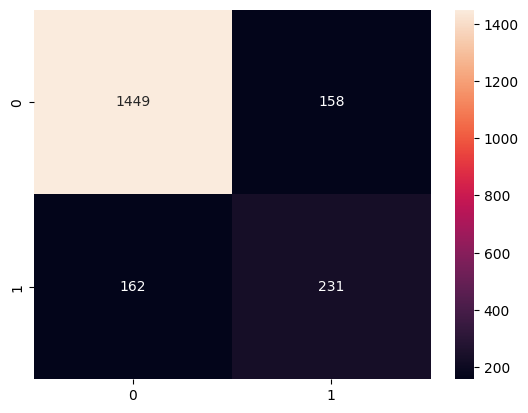

In [ ]:
rf =RandomForestClassifier(max_depth= None, min_samples_split= 2, n_estimators= 200)
rf.fit(X_train_sm,y_train_sm)
y_pred = rf.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")
plt.show()


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
F1_score=f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [ ]:
accuracy

0.84

Now generate code using ANN


In [ ]:
!pip install tensorflow==2.12.0


  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.9.0
    Uninstalling keras-3.9.0:
      Successfully uninstalled keras-3.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires keras>=3.2.0, but you have keras 2.12.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.12.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is incompatible.


In [ ]:
#import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
##Sequential helps is constructing block where we can perform neural networks and do forward and backward propogation
##Dense create neuron in networks creating layers
##activation function in hidden layers
##dropout layer (done to reduce overfitting) few percantage of layer are deactivated while training helps to improve accuracy
X_train_sm.shape

(12712, 10)

In [ ]:
#Intialize ANN
classifier =Sequential()
#adding input layer
classifier.add(Dense(units=11,activation="relu"))
#add first hidden layer
classifier.add(Dense(units=7,activation="relu"))
#add second hidden layer
classifier.add(Dense(units=6,activation="relu"))
#add output layer
classifier.add(Dense(units=1,activation="sigmoid"))
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
##by default learning rate is 0.01
##when the number of epochs are high and accuracy starts getting constant we apply early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [ ]:
model_history =classifier.fit(X_train_sm,y_train_sm,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
852/852 [==============================] - 7s 6ms/step - loss: 0.5334 - accuracy: 0.7408 - val_loss: 1.1393 - val_accuracy: 0.0429
Epoch 2/100
852/852 [==============================] - 3s 4ms/step - loss: 0.4574 - accuracy: 0.7799 - val_loss: 1.0495 - val_accuracy: 0.3204
Epoch 3/100
852/852 [==============================] - 2s 3ms/step - loss: 0.4258 - accuracy: 0.7985 - val_loss: 0.8976 - val_accuracy: 0.5061
Epoch 4/100
852/852 [==============================] - 2s 3ms/step - loss: 0.4085 - accuracy: 0.8312 - val_loss: 0.9133 - val_accuracy: 0.5082
Epoch 5/100
852/852 [==============================] - 3s 4ms/step - loss: 0.3992 - accuracy: 0.8353 - val_loss: 0.9240 - val_accuracy: 0.5156
Epoch 6/100
852/852 [==============================] - 2s 3ms/step - loss: 0.3926 - accuracy: 0.8370 - val_loss: 0.9164 - val_accuracy: 0.5147
Epoch 7/100
852/852 [==============================] - 2s 2ms/step - loss: 0.3876 - accuracy: 0.8397 - val_loss: 0.8990 - val_accuracy: 0.5275

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

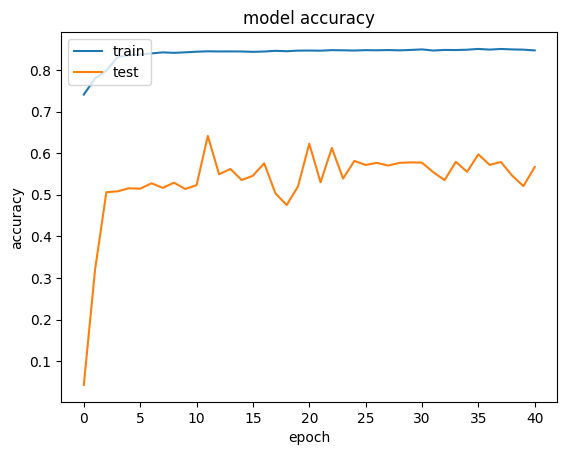

In [ ]:
#summarize the data
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

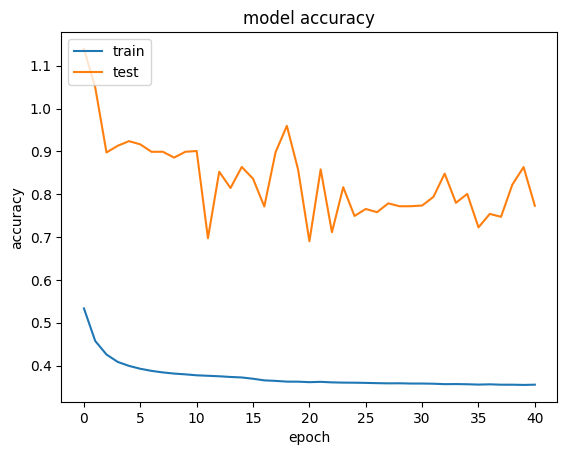

In [ ]:
#summarize the data
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
accuracy_score(y_test,y_pred)


63/63 [==============================] - 1s 5ms/step


0.859

In [ ]:
model_history_new =classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)



Epoch 1/100
536/536 [==============================] - 3s 3ms/step - loss: 0.4970 - accuracy: 0.7903 - val_loss: 0.4723 - val_accuracy: 0.7910
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4456 - accuracy: 0.7975 - val_loss: 0.4482 - val_accuracy: 0.7925
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4204 - accuracy: 0.8110 - val_loss: 0.4268 - val_accuracy: 0.8023
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3989 - accuracy: 0.8164 - val_loss: 0.4083 - val_accuracy: 0.8069
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3798 - accuracy: 0.8246 - val_loss: 0.3929 - val_accuracy: 0.8186
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3676 - accuracy: 0.8442 - val_loss: 0.3865 - val_accuracy: 0.8353
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3600 - accuracy: 0.8522 - val_loss: 0.3832 - val_accuracy: 0.8421

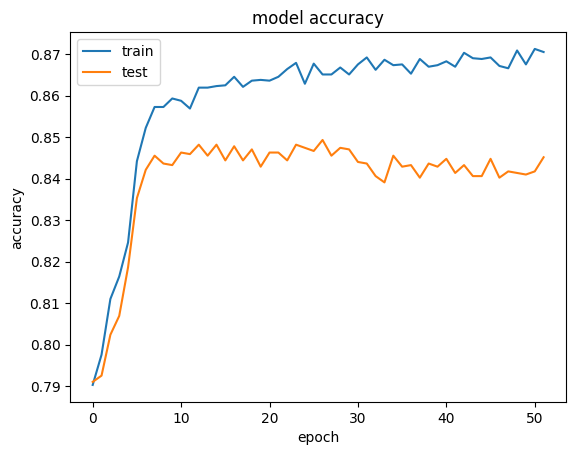

In [ ]:
#summarize the data
plt.plot(model_history_new.history["accuracy"])
plt.plot(model_history_new.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
accuracy_score(y_test,y_pred)


63/63 [==============================] - 0s 3ms/step


0.859